In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input
import keras

import tensorflow as tf
import keras
import scipy

import numpy as np
from sklearn.metrics import confusion_matrix

2024-04-24 00:43:57.249423: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-24 00:43:57.576338: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-24 00:43:57.576458: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-24 00:43:57.612539: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-24 00:43:57.715664: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# Define parameters and data directory
img_width, img_height = 128, 128
batch_size = 32
data_dir = 'data'

In [3]:
# Create an ImageDataGenerator for training with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.1765  # Approx 15% for validation, when combined with 70% training
)

In [4]:
# Create an ImageDataGenerator for testing (no augmentation, just scaling)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Prepare iterators
train_generator = train_datagen.flow_from_directory(
    data_dir + '/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=False
)

validation_generator = train_datagen.flow_from_directory(
    data_dir + '/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    data_dir + '/test',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 9783 images belonging to 2 classes.
Found 2096 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [6]:
# First Model:
# Accuracy: 66.549%
# 15 Epochs
# model = keras.models.Sequential([
#     keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_height, img_width, 3)),
#     keras.layers.MaxPooling2D(2, 2),
#     keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
#     keras.layers.MaxPooling2D(2, 2),
#     keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
#     keras.layers.MaxPooling2D(2, 2),
    
#     # Global average pooling layer instead of flattening to reduce dimensionality
#     keras.layers.GlobalAveragePooling2D(),
    
#     # Dense layers for classification
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

# Second Model (ResNet)
# Accuracy: 64.149%
# Epochs: 15
# Load a pre-trained ResNet and add custom layers
# base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(img_height, img_width, 3)))
# base_model.trainable = False  # Freeze the base model
# model = keras.models.Sequential([
#     base_model,  # Pre-trained ResNet50 base model
#     keras.layers.GlobalAveragePooling2D(),  # Reduce dimensionality and prevent overfitting
#     keras.layers.Dense(64, activation='relu'),  # First Dense layer
#     keras.layers.Dropout(0.5),  # Dropout to combat overfitting
#     keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
# ])


# Third Model
# Accuracy: 82%
# Epochs: 15
# model = keras.models.Sequential([
#     keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
#     keras.layers.MaxPooling2D(2, 2),
#     keras.layers.Conv2D(32, (3, 3), activation='relu'),
#     keras.layers.MaxPooling2D(2, 2),
#     keras.layers.Flatten(),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(1, activation='sigmoid')
    
# ])

# Fourth/Final Model
# Accuracy 84.85%
# Epochs: 15
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.4),  # Adjusted dropout rate
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 128)       0

In [7]:
# Run this cell to train model
epochs = 15
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
)
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test accuracy:', test_accuracy)
model.save('model5.h5')

Epoch 1/15
305/305 [==============================] - 170s 555ms/step - loss: 0.6344 - accuracy: 0.6298 - val_loss: 0.6589 - val_accuracy: 0.6918
Epoch 2/15
305/305 [==============================] - 181s 593ms/step - loss: 0.6233 - accuracy: 0.6454 - val_loss: 0.6394 - val_accuracy: 0.6322
Epoch 3/15
305/305 [==============================] - 164s 537ms/step - loss: 0.6643 - accuracy: 0.6531 - val_loss: 0.6390 - val_accuracy: 0.6183
Epoch 4/15
305/305 [==============================] - 169s 554ms/step - loss: 0.6124 - accuracy: 0.6443 - val_loss: 0.6363 - val_accuracy: 0.6245
Epoch 5/15
305/305 [==============================] - 178s 583ms/step - loss: 0.6091 - accuracy: 0.6739 - val_loss: 0.6279 - val_accuracy: 0.6250
Epoch 6/15
305/305 [==============================] - 169s 553ms/step - loss: 0.5954 - accuracy: 0.6636 - val_loss: 0.6204 - val_accuracy: 0.6389
Epoch 7/15
305/305 [==============================] - 171s 562ms/step - loss: 0.5934 - accuracy: 0.6978 - val_loss: 0.6229 -

/home/afriedsam/Programming/intro-AI/env/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
# RUN THIS CELL TO LOAD PRETRAINED MODEL

model = keras.models.load_model('model5.h5')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')

63/63 [==============================] - 11s 170ms/step - loss: 0.3732 - accuracy: 0.8485
Test accuracy: 0.8485000133514404


In [22]:
# Generate predictions for the entire test set
predictions = model.predict(test_generator)

# Tweaking cutoff for prediction probability reduces false negatives by a lot but doesn't decrease accuracy too much

predicted_classes = (predictions > 0.5).astype(int)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
true_positive = cm[1, 1]
false_positive = cm[0, 1]
true_negative = cm[0, 0]
false_negative = cm[1, 0]

# Display results
print("Confusion Matrix:")
print(cm)

print("\nMetrics:")
print(f"Number of Images: {len(true_classes)}")
print(f"Correctly Predicted: {true_positive + true_negative}")
print(f"False Positives: {false_positive}")
print(f"False Negatives: {false_negative}")
print(f"Accuracy: {round((true_positive + true_negative) / 2000 * 100, 2)}%")

63/63 [==============================] - 10s 153ms/step
Confusion Matrix:
[[812 188]
 [115 885]]

Metrics:
Number of Images: 2000
Correctly Predicted: 1697
False Positives: 188
False Negatives: 115
Accuracy: 84.85%


# A Note On Prediction Threshold:
We have found that we are able to yield the highest accuracy rating using a threshold of 0.5. Predictions greater than 0.5 are classified as malignant and predictions lower than 0.5 are classified as benign. If we lower this threshold we will decrease our accuracy. However, we can also significantly lower the number of false negatives by lowering this threshold. Additionally, the lower threshold still yields a relatively good accuracy rating. See graphs below to the tradeoffs. Ideally, users of this software could set their own threshold based on their individual use cases.

| Threshold | Accuracy | Correct Predictions | False Positives | False Negatives |
|-----------|----------|---------------------|-----------------|-----------------|
| 0.15      | 70.5%    | 1410/2000           | 589/2000        | 1/2000          |
| 0.20      | 74.05%   | 1481/2000           | 514/2000        | 5/2000          |
| 0.25      | 77.25%   | 1545/2000           | 446/2000        | 9/2000          |
| 0.3       | 80.85%   | 1617/2000           | 365/2000        | 18/2000         |
| 0.35      | 82.95%   | 1659/2000           | 308/2000        | 33/2000         |
| 0.4       | 84.45%   | 1689/2000           | 250/2000        | 51/2000         |
| 0.45      | 84.7%    | 1694/2000           | 229/2000        | 77/2000         |
| 0.5       | 84.85%   | 1697/2000           | 188/2000        | 115/2000        |


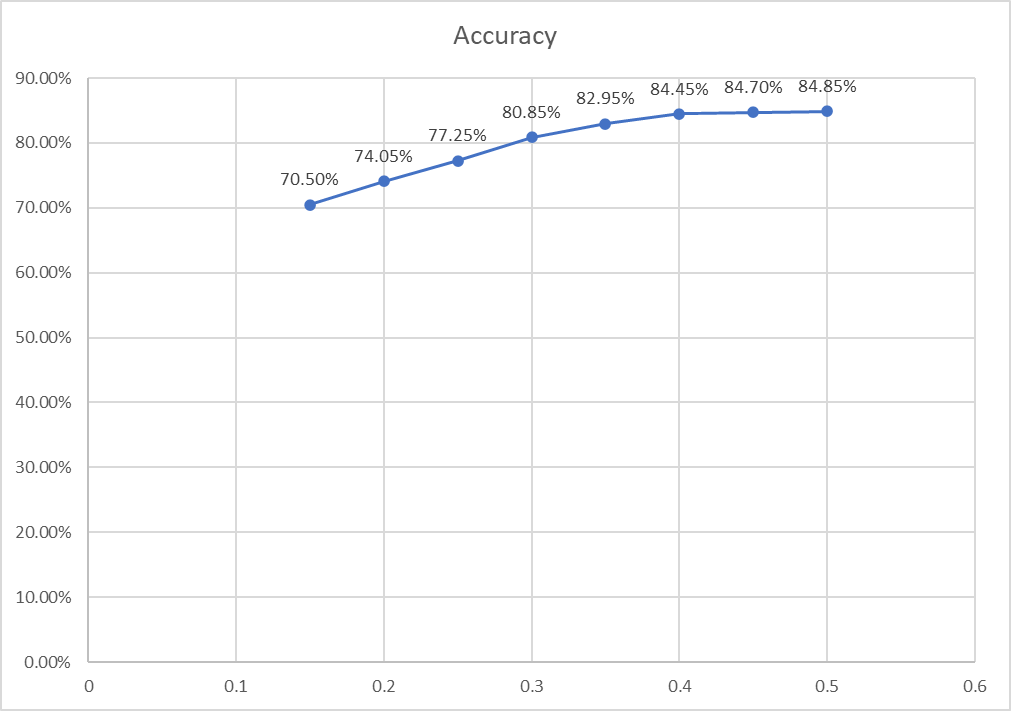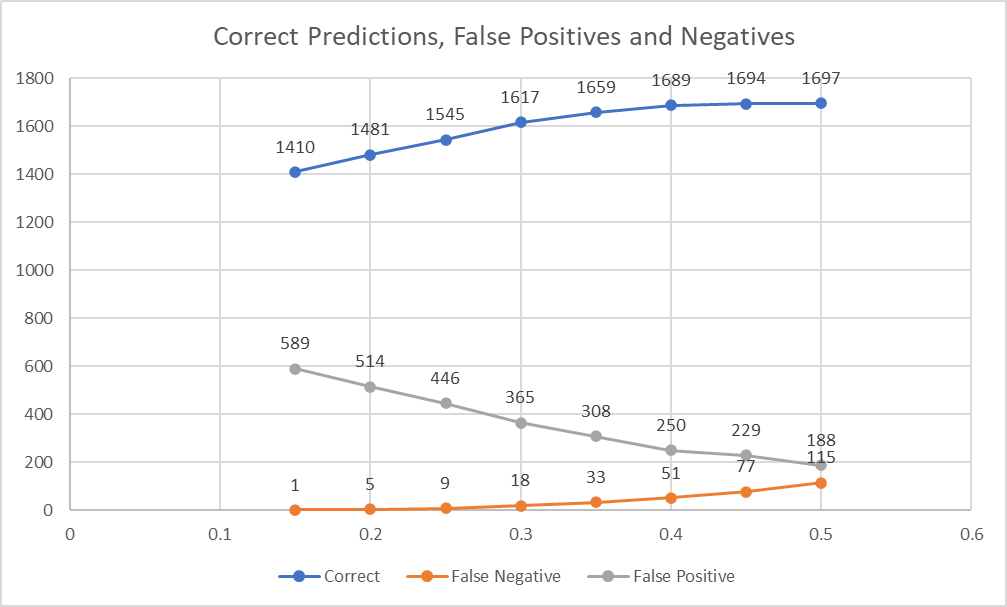